In [1]:
import pandas as pd
df = pd.read_csv('FFE_Final.csv')
print(df.shape)

(4857853, 56)


In [2]:
df.describe()

,Current Energy Efficiency (EPC Score),Potential Energy Efficiency (EPC Score),Total Floor Area (m²),Has Mains Gas,Main Heating Controls,Proportion of Multi-Glazing (%),Number of Extensions,Number of Habitable Rooms,Number of Heated Rooms,Low Energy Lighting (%),...,County Average Price (Thousands),LAT,LONG,OSEAST1M,OSNRTH1M,CONSTRUCTION_AGE_BAND_ENCODED,Unemployment rate (%),Inflation rate (%),Day,Interest rate (%)
count,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,...,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.857853e+06,4.421869e+06,4.815415e+06,4.857853e+06,4.857853e+06,4.857853e+06
mean,6.346909e+01,8.084420e+01,9.243766e+01,9.281837e-01,2.129017e+03,9.332082e+01,5.272990e-01,4.663555e+00,4.442528e+00,6.310905e+01,...,3.699731e+02,5.242009e+01,-1.361364e+00,4.439401e+05,2.812498e+05,3.473130e+00,4.196032e+00,3.662629e+00,1.714229e+01,1.882139e+00
std,1.385390e+01,1.056981e+01,2.469926e+02,2.581835e-01,9.837129e+01,2.182726e+01,7.617101e-01,1.423398e+00,1.458327e+00,3.618931e+01,...,1.820108e+02,1.188899e+00,1.310633e+00,9.040631e+04,1.317485e+05,2.967427e+00,4.020609e-01,2.627354e+00,8.961957e+00,2.010439e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.283309e+02,4.991285e+01,-6.317952e+00,9.014700e+04,1.027900e+04,0.000000e+00,3.600000e+00,5.000000e-01,1.000000e+00,1.000000e-01
25%,5.700000e+01,7.700000e+01,6.900000e+01,1.000000e+00,2.106000e+03,1.000000e+02,0.000000e+00,4.000000e+00,4.000000e+00,3.200000e+01,...,2.445028e+02,5.145438e+01,-2.212919e+00,3.857760e+05,1.741880e+05,1.000000e+00,3.900000e+00,1.800000e+00,1.000000e+01,2.500000e-01
50%,6.500000e+01,8.300000e+01,8.400000e+01,1.000000e+00,2.106000e+03,1.000000e+02,0.000000e+00,5.000000e+00,4.000000e+00,7.100000e+01,...,3.145636e+02,5.230026e+01,-1.449169e+00,4.366740e+05,2.675110e+05,3.000000e+00,4.100000e+00,2.700000e+00,1.800000e+01,7.500000e-01
75%,7.200000e+01,8.600000e+01,1.050000e+02,1.000000e+00,2.106000e+03,1.000000e+02,1.000000e+00,5.000000e+00,5.000000e+00,1.000000e+02,...,4.207870e+02,5.341804e+01,-2.909450e-01,5.179920e+05,3.915010e+05,5.000000e+00,4.400000e+00,4.800000e+00,2.500000e+01,4.250000e+00
max,1.650000e+02,8.388000e+03,5.303316e+05,1.000000e+00,2.706000e+03,1.000000e+02,4.000000e+00,9.900000e+01,9.400000e+01,5.160000e+02,...,8.236410e+02,5.579741e+01,1.757953e+00,6.552470e+05,6.560140e+05,1.200000e+01,5.300000e+00,9.600000e+00,3.100000e+01,5.250000e+00


In [3]:
avg_day_price = df.groupby('Date')['Price (Thousands)'].mean().reset_index()
avg_day_price.columns = ['Date', 'Average Price (Thousands)']

avg_day_of_the_week_price = df.groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
avg_day_of_the_week_price.columns = ['Day of the Week', 'Average Price (Thousands)']

avg_quarter_price = df.groupby('Quarter')['Price (Thousands)'].mean().reset_index()
avg_quarter_price.columns = ['Quarter', 'Average Price (Thousands)']

avg_year_price = df.groupby('Year')['Price (Thousands)'].mean().reset_index()
avg_year_price.columns = ['Year', 'Average Price (Thousands)']

avg_month_price = df.groupby('Month')['Price (Thousands)'].mean().reset_index()
avg_month_price.columns = ['Month', 'Average Price (Thousands)']

avg_year_price


,Year,Average Price (Thousands)
0,2018,253.400965
1,2019,254.674325
2,2020,270.261615
3,2021,288.287479
4,2022,296.028637
5,2023,292.695413
6,2024,297.961020
7,2025,305.440052


In [4]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

avg_month_price['Month'] = avg_month_price['Month'].map(month_names)
avg_month_price

,Month,Average Price (Thousands)
0,January,276.839254
1,February,275.866611
2,March,284.219627
3,April,270.360994
4,May,271.141087
5,June,289.882845
6,July,275.369916
7,August,281.744490
8,September,287.104216
9,October,279.804098


In [5]:
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
avg_day_of_the_week_price['Day of the Week'] = avg_day_of_the_week_price['Day of the Week'].map(day_names)
avg_day_of_the_week_price

,Day of the Week,Average Price (Thousands)
0,Monday,282.814310
1,Tuesday,288.256071
2,Wednesday,286.702240
3,Thursday,290.296165
4,Friday,271.895361
5,Saturday,255.732789
6,Sunday,259.042534


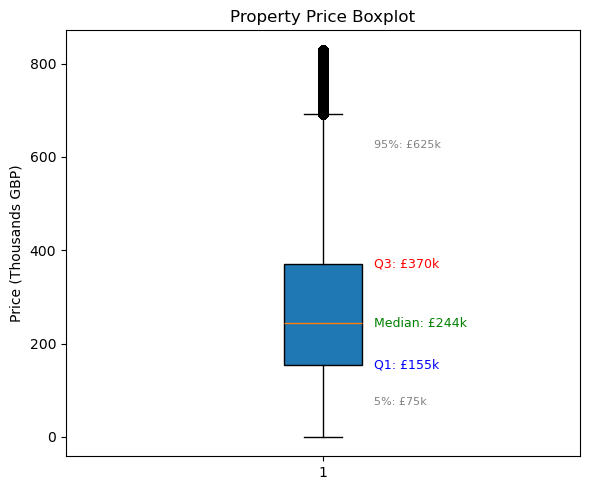

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get descriptive statistics
q1 = df['Price (Thousands)'].quantile(0.25)
median = df['Price (Thousands)'].median()
q3 = df['Price (Thousands)'].quantile(0.75)
whisker_low = df['Price (Thousands)'].quantile(0.05)  # Or use boxplot output
whisker_high = df['Price (Thousands)'].quantile(0.95)

plt.figure(figsize=(6, 5))
plt.boxplot(df['Price (Thousands)'], vert=True, patch_artist=True)
plt.title('Property Price Boxplot')
plt.ylabel('Price (Thousands GBP)')

# Add labels for Q1, Median, Q3
plt.text(1.1, q1, f'Q1: £{q1:,.0f}k', va='center', ha='left', fontsize=9, color='blue')
plt.text(1.1, median, f'Median: £{median:,.0f}k', va='center', ha='left', fontsize=9, color='green')
plt.text(1.1, q3, f'Q3: £{q3:,.0f}k', va='center', ha='left', fontsize=9, color='red')

# Optional: Add whiskers if desired
plt.text(1.1, whisker_low, f'5%: £{whisker_low:,.0f}k', va='center', ha='left', fontsize=8, color='gray')
plt.text(1.1, whisker_high, f'95%: £{whisker_high:,.0f}k', va='center', ha='left', fontsize=8, color='gray')

plt.tight_layout()
plt.show()


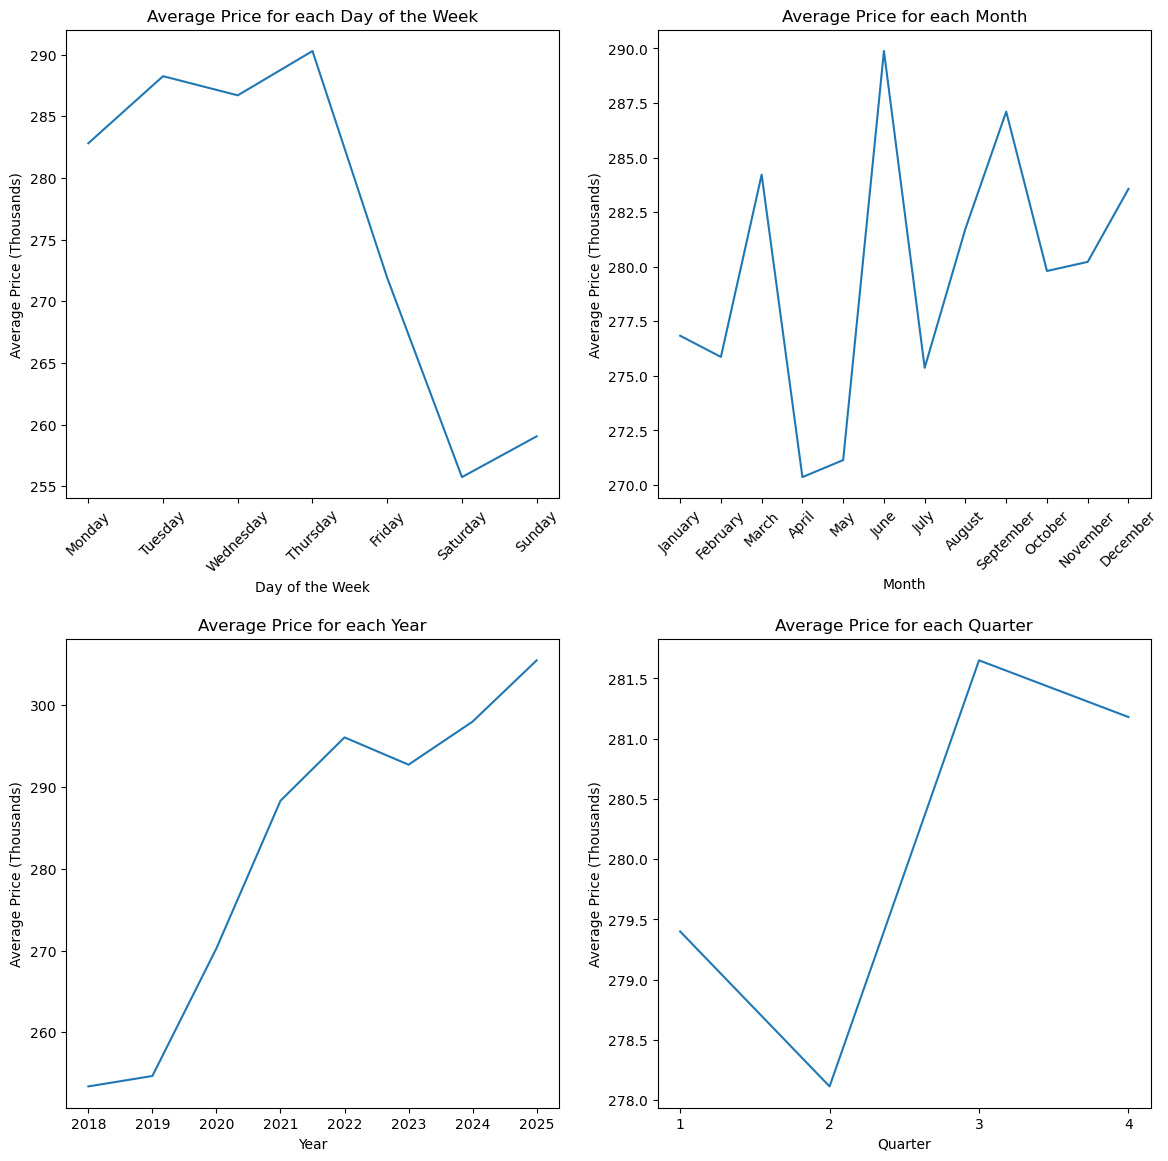

In [7]:
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

from matplotlib.ticker import MaxNLocator

ax3.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax0.set_title('Average Price for each Day of the Week')
ax1.set_title('Average Price for each Month')
ax2.set_title('Average Price for each Year')
ax3.set_title('Average Price for each Quarter')

ax0.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='x', rotation=45)


sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=avg_day_of_the_week_price, ax=ax0)
sns.lineplot(x='Month', y='Average Price (Thousands)', data=avg_month_price, ax=ax1)
sns.lineplot(x='Year', y='Average Price (Thousands)', data=avg_year_price, ax=ax2)
sns.lineplot(x='Quarter', y='Average Price (Thousands)', data=avg_quarter_price, ax=ax3)

plt.subplots_adjust(hspace=0.3)

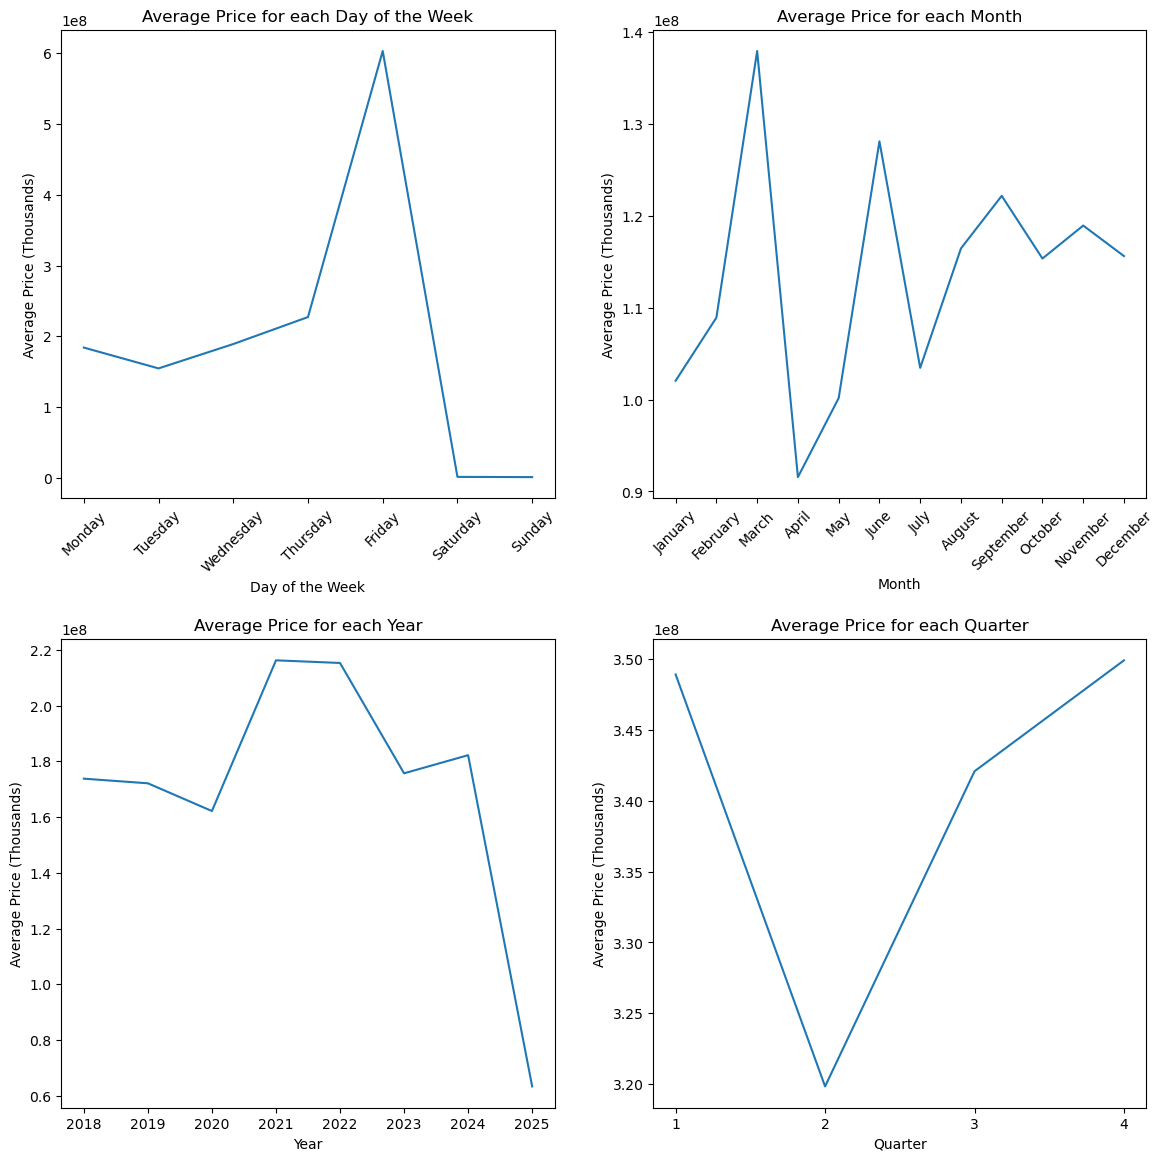

In [8]:
tot_day_price = df.groupby('Date')['Price (Thousands)'].sum().reset_index()
tot_day_price.columns = ['Date', 'Average Price (Thousands)']

tot_day_of_the_week_price = df.groupby('Day of the Week')['Price (Thousands)'].sum().reset_index()
tot_day_of_the_week_price.columns = ['Day of the Week', 'Average Price (Thousands)']

tot_quarter_price = df.groupby('Quarter')['Price (Thousands)'].sum().reset_index()
tot_quarter_price.columns = ['Quarter', 'Average Price (Thousands)']

tot_year_price = df.groupby('Year')['Price (Thousands)'].sum().reset_index()
tot_year_price.columns = ['Year', 'Average Price (Thousands)']

tot_month_price = df.groupby('Month')['Price (Thousands)'].sum().reset_index()
tot_month_price.columns = ['Month', 'Average Price (Thousands)']

tot_day_of_the_week_price['Day of the Week'] = tot_day_of_the_week_price['Day of the Week'].map(day_names)
tot_month_price['Month'] = tot_month_price['Month'].map(month_names)

tot_day_of_the_week_price
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

from matplotlib.ticker import MaxNLocator

ax3.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax0.set_title('Total Units Sold for each Day of the Week')
ax1.set_title('Total Units Sold  for each Month')
ax2.set_title('Total Units Sold for each Year')
ax3.set_title('Total Units Sold for each Quarter')

ax0.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='x', rotation=45)


sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=tot_day_of_the_week_price, ax=ax0)
sns.lineplot(x='Month', y='Average Price (Thousands)', data=tot_month_price, ax=ax1)
sns.lineplot(x='Year', y='Average Price (Thousands)', data=tot_year_price, ax=ax2)
sns.lineplot(x='Quarter', y='Average Price (Thousands)', data=tot_quarter_price, ax=ax3)

plt.subplots_adjust(hspace=0.3)

In [9]:
type_count = df[['Flat','Semi-detached','Terraced', 'Detached', 'Other Property Type']].sum().reset_index()
type_count.columns = ['Property Type','Count']
new_old_count = df[['New Build','Old Build']].sum().reset_index()
new_old_count.columns = ['New or Old Build','Count']
tenure_count = df[['Freehold Tenure','Leasehold Tenure']].sum().reset_index()
tenure_count.columns = ['Tenure Type','Count']


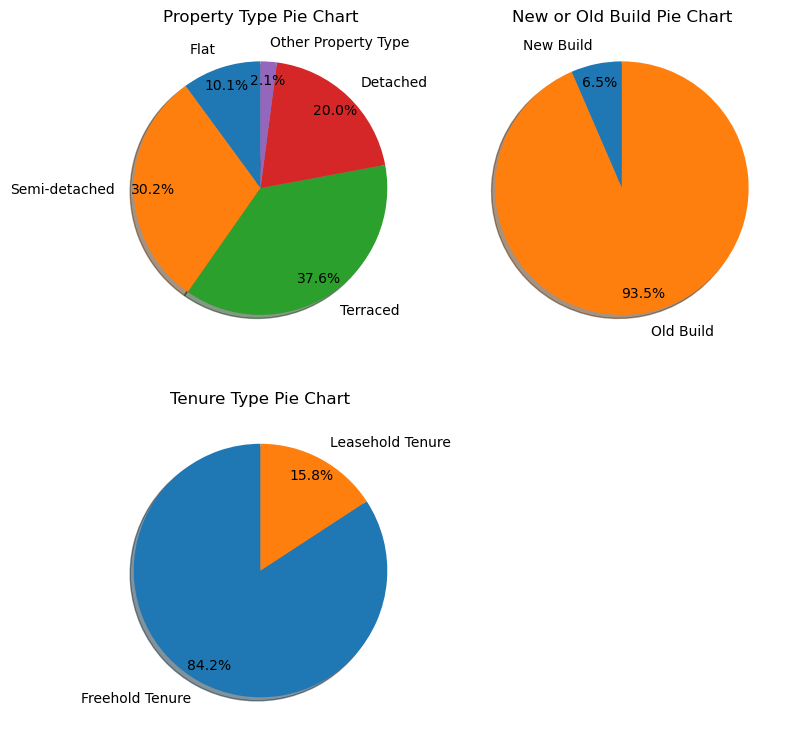

In [10]:
fig = plt.figure(figsize=(20, 20))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)

ax0.set_title('Property Type Pie Chart')
ax1.set_title('New or Old Build Pie Chart')
ax2.set_title('Tenure Type Pie Chart')

tc_label = ['Flat','Semi-detached','Terraced', 'Detached', 'Other Property Type']
NO_label = ['New Build','Old Build']
TT_label = ['Freehold Tenure','Leasehold Tenure']

type_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=tc_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax0
)
ax0.set_ylabel('')
plt.tight_layout()

new_old_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=NO_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax1
)
ax1.set_ylabel('')
plt.tight_layout()

tenure_count['Count'].plot(
    kind='pie',
    figsize=(8, 8),
    labels=TT_label,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.15,
    ax=ax2
)
ax2.set_ylabel('')
plt.tight_layout()

<Axes: xlabel='Price (Thousands)', ylabel='Count'>

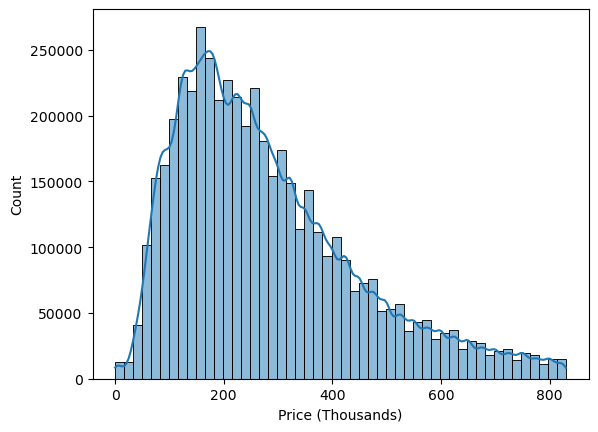

In [11]:
sns.histplot(df['Price (Thousands)'], kde=True, bins=50)

<Axes: xlabel='Year', ylabel='Price (Thousands)'>

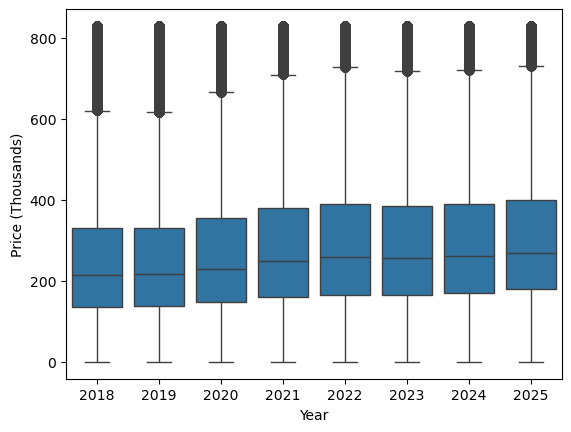

In [12]:
sns.boxplot(x='Year', y='Price (Thousands)', data=df)

In [13]:
oth_prop = df[df['Other Property Type'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
oth_prop.columns = ['Day of the Week', 'Average Price (Thousands)']
oth_prop

,Day of the Week,Average Price (Thousands)
0,0,256.479233
1,1,253.470573
2,2,259.684980
3,3,261.050920
4,4,265.000421
5,5,174.933543
6,6,191.011362


<Axes: title={'center': 'Average Price for each Day of the Week'}, xlabel='Day of the Week', ylabel='Average Price (Thousands)'>

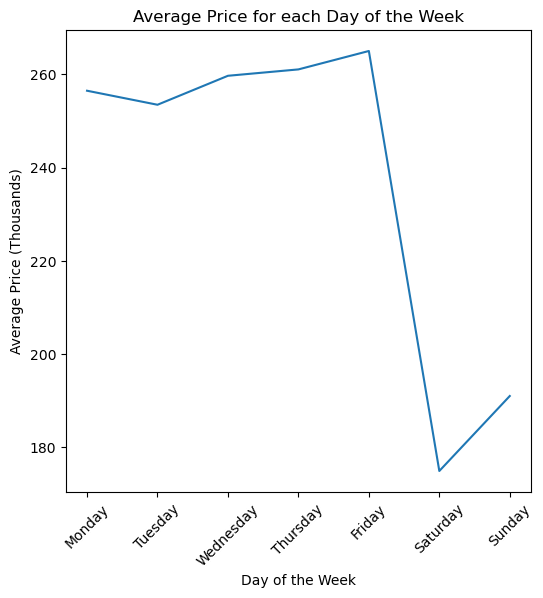

In [14]:
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
oth_prop['Day of the Week'] = oth_prop['Day of the Week'].map(day_names)
ax0 = plt.figure(figsize=(6, 6)).add_subplot(1,1, 1)
ax0.tick_params(axis='x', rotation=45)
ax0.set_title('Average Price for each Day of the Week')
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=oth_prop, ax=ax0)

<Axes: title={'center': 'Average Price for each Day of the Week Terraced'}, xlabel='Day of the Week', ylabel='Average Price (Thousands)'>

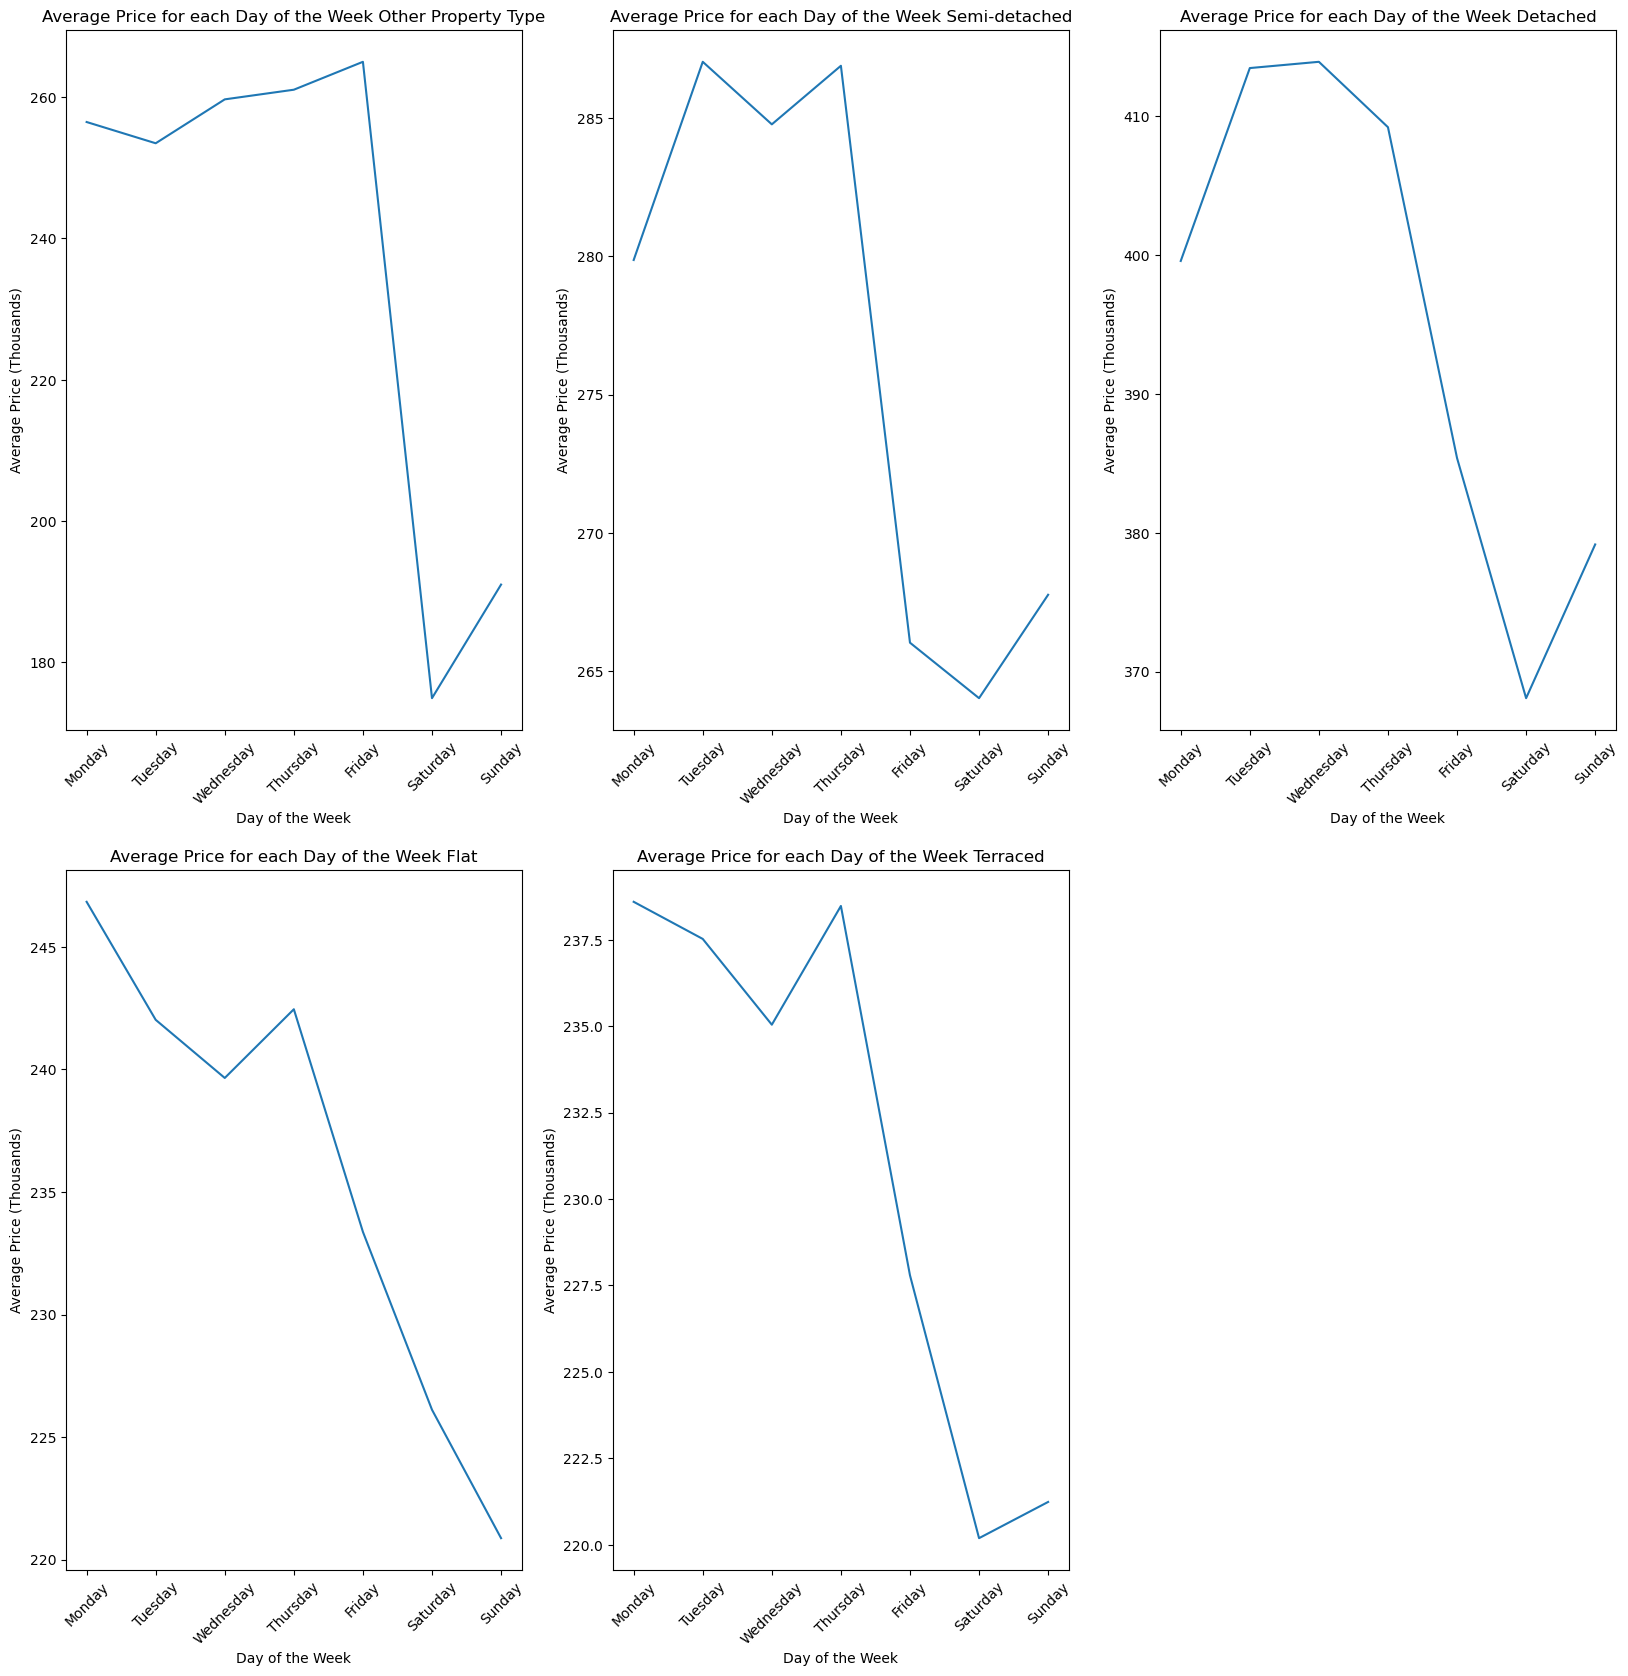

In [15]:
sd_prop = df[df['Semi-detached'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
sd_prop.columns = ['Day of the Week', 'Average Price (Thousands)']
det_prop = df[df['Detached'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
det_prop.columns = ['Day of the Week', 'Average Price (Thousands)']
flt_prop = df[df['Flat'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
flt_prop.columns = ['Day of the Week', 'Average Price (Thousands)']
ter_prop = df[df['Terraced'] == 1].groupby('Day of the Week')['Price (Thousands)'].mean().reset_index()
ter_prop.columns = ['Day of the Week', 'Average Price (Thousands)']

sd_prop['Day of the Week'] = sd_prop['Day of the Week'].map(day_names)
det_prop['Day of the Week'] = det_prop['Day of the Week'].map(day_names)
flt_prop['Day of the Week'] = flt_prop['Day of the Week'].map(day_names)
ter_prop['Day of the Week'] = ter_prop['Day of the Week'].map(day_names)

fig = plt.figure(figsize=(20, 20))

ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)
ax2 = fig.add_subplot(2,3,3)
ax3 = fig.add_subplot(2,3,4)
ax4 = fig.add_subplot(2,3,5)

ax0.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)

ax0.set_title('Average Price for each Day of the Week Other Property Type')
ax1.set_title('Average Price for each Day of the Week Semi-detached')
ax2.set_title('Average Price for each Day of the Week Detached')
ax3.set_title('Average Price for each Day of the Week Flat')
ax4.set_title('Average Price for each Day of the Week Terraced')

sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=oth_prop, ax=ax0)
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=sd_prop, ax=ax1)
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=det_prop, ax=ax2)
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=flt_prop, ax=ax3)
sns.lineplot(x='Day of the Week', y='Average Price (Thousands)', data=ter_prop, ax=ax4)


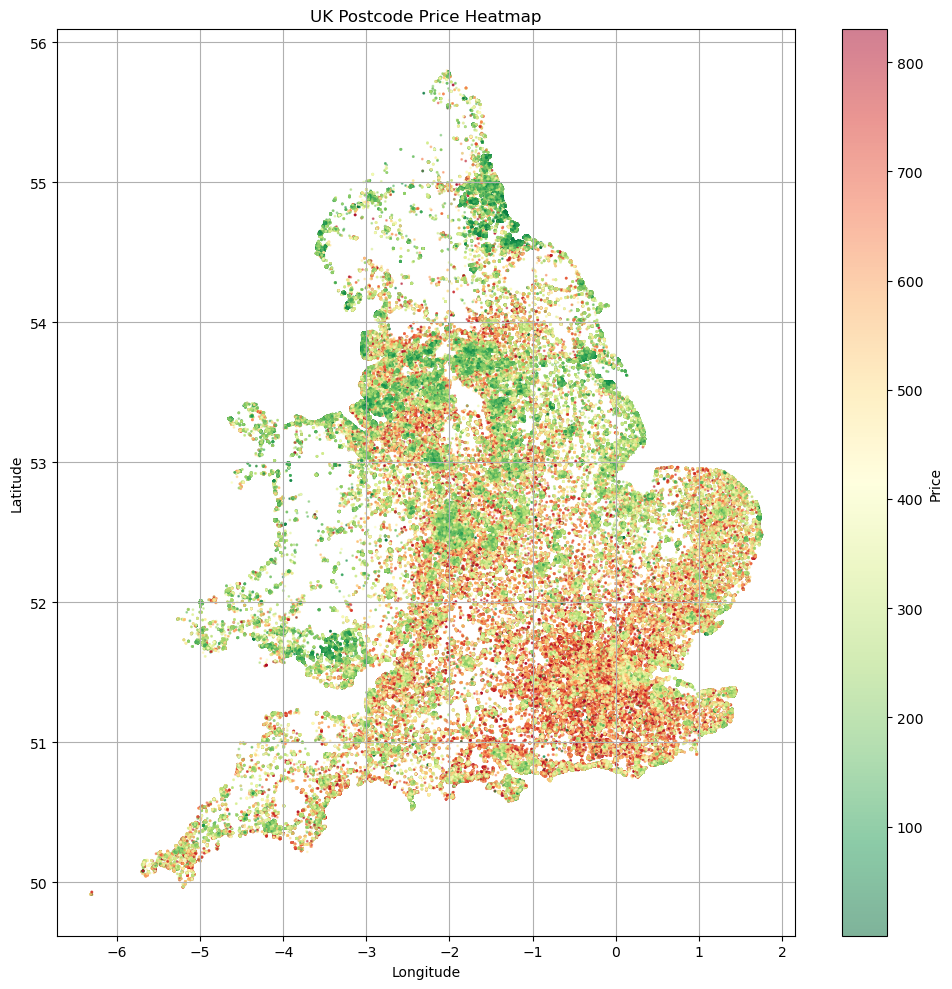

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.scatter(
    df['LONG'],
    df['LAT'],
    c=df['Price (Thousands)'],
    cmap='RdYlGn_r',
    s=1,
    alpha=0.5
)

plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UK Postcode Price Heatmap')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
df.columns

Index(['Current Energy Efficiency (EPC Score)',
       'Potential Energy Efficiency (EPC Score)', 'Total Floor Area (m²)',
       'Has Mains Gas', 'Main Heating Controls',
       'Proportion of Multi-Glazing (%)', 'Number of Extensions',
       'Number of Habitable Rooms', 'Number of Heated Rooms',
       'Low Energy Lighting (%)', 'Number of Open Fireplaces',
       'Hot Water Energy Efficiency', 'Windows Energy Efficiency',
       'Windows Environmental Impact', 'Walls Energy Efficiency',
       'Roof Energy Efficiency', 'Roof Environmental Impact',
       'Main Heating Energy Efficiency', 'Main Heating Environmental Impact',
       'Main Heating Controls Energy Efficiency',
       'Main Heating Controls Environmental Impact',
       'Lighting Energy Efficiency', 'Lighting Environmental Impact',
       'Number of Wind Turbines', 'Floor Height (m)',
       'Has Solar Water Heating', 'Price (Thousands)', 'Freehold Tenure',
       'Leasehold Tenure', 'Old Build', 'New Build', 'Detached'

In [18]:
avg_CEPC_price = df.groupby('Current Energy Efficiency (EPC Score)')['Price (Thousands)'].mean().reset_index()
avg_CEPC_price.columns = ['Current Energy Efficiency (EPC Score)', 'Average Price (Thousands)']

avg_PEPC_price = df.groupby('Potential Energy Efficiency (EPC Score)')['Price (Thousands)'].mean().reset_index()
avg_PEPC_price.columns = ['Potential Energy Efficiency (EPC Score)', 'Average Price (Thousands)']

avg_M2_price = df.groupby('Total Floor Area (m²)')['Price (Thousands)'].mean().reset_index()
avg_M2_price.columns = ['Total Floor Area (m²)', 'Average Price (Thousands)']

avg_HR_price = df.groupby('Number of Habitable Rooms')['Price (Thousands)'].mean().reset_index()
avg_HR_price.columns = ['Number of Habitable Rooms', 'Average Price (Thousands)']

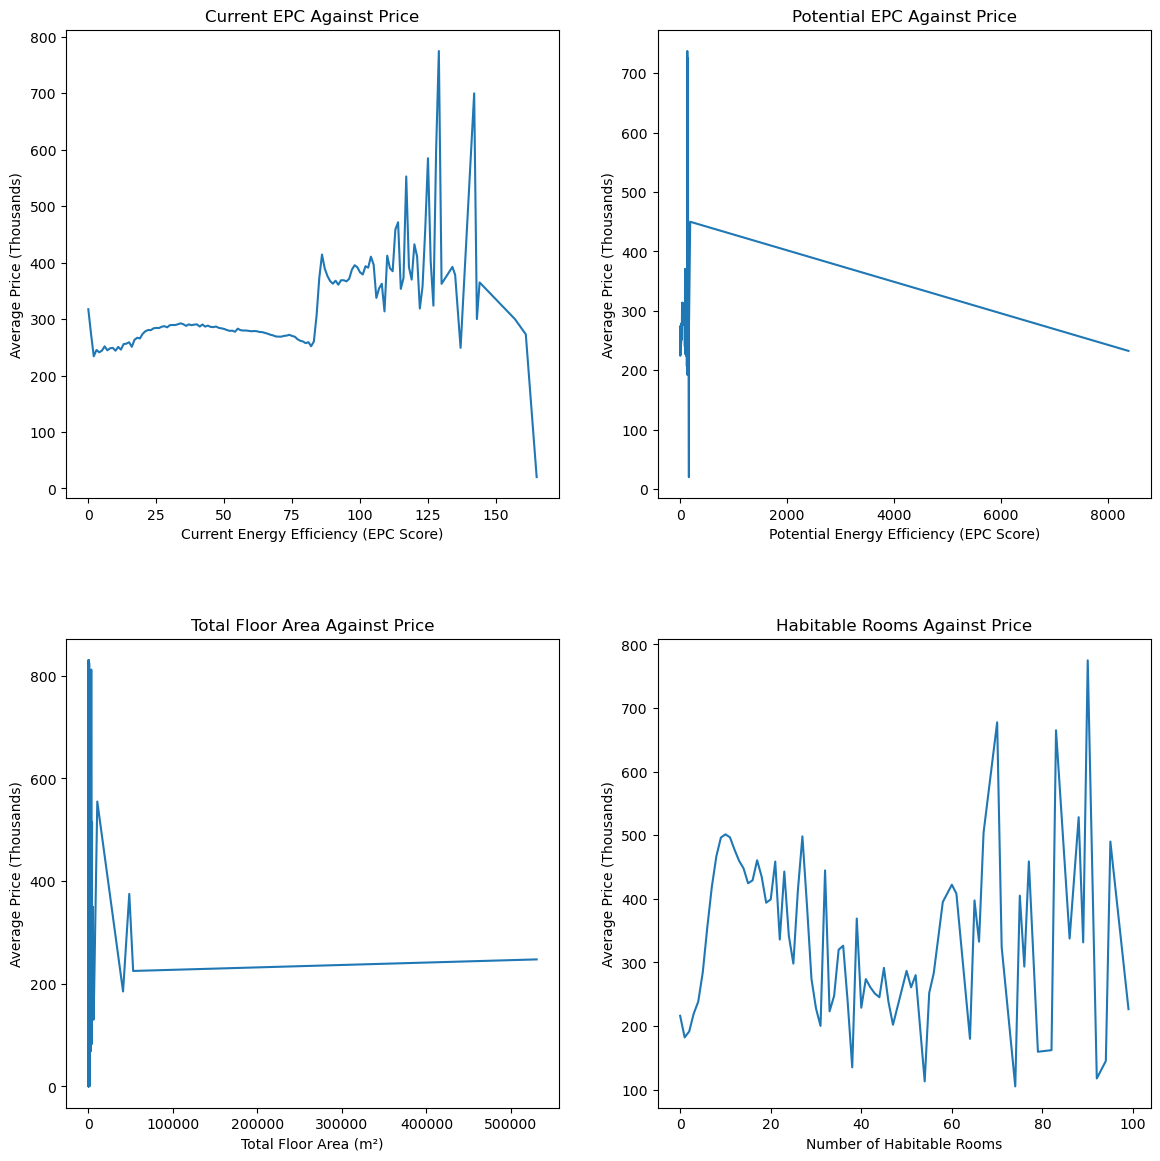

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax0.set_title('Current EPC Against Price')
ax1.set_title('Potential EPC Against Price')
ax2.set_title('Total Floor Area Against Price')
ax3.set_title('Habitable Rooms Against Price')

sns.lineplot(x='Current Energy Efficiency (EPC Score)', y='Average Price (Thousands)', data=avg_CEPC_price, ax=ax0)
sns.lineplot(x='Potential Energy Efficiency (EPC Score)', y='Average Price (Thousands)', data=avg_PEPC_price, ax=ax1)
sns.lineplot(x='Total Floor Area (m²)', y='Average Price (Thousands)', data=avg_M2_price, ax=ax2)
sns.lineplot(x='Number of Habitable Rooms', y='Average Price (Thousands)', data=avg_HR_price, ax=ax3)

plt.subplots_adjust(hspace=0.3)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000208EE77CCC0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

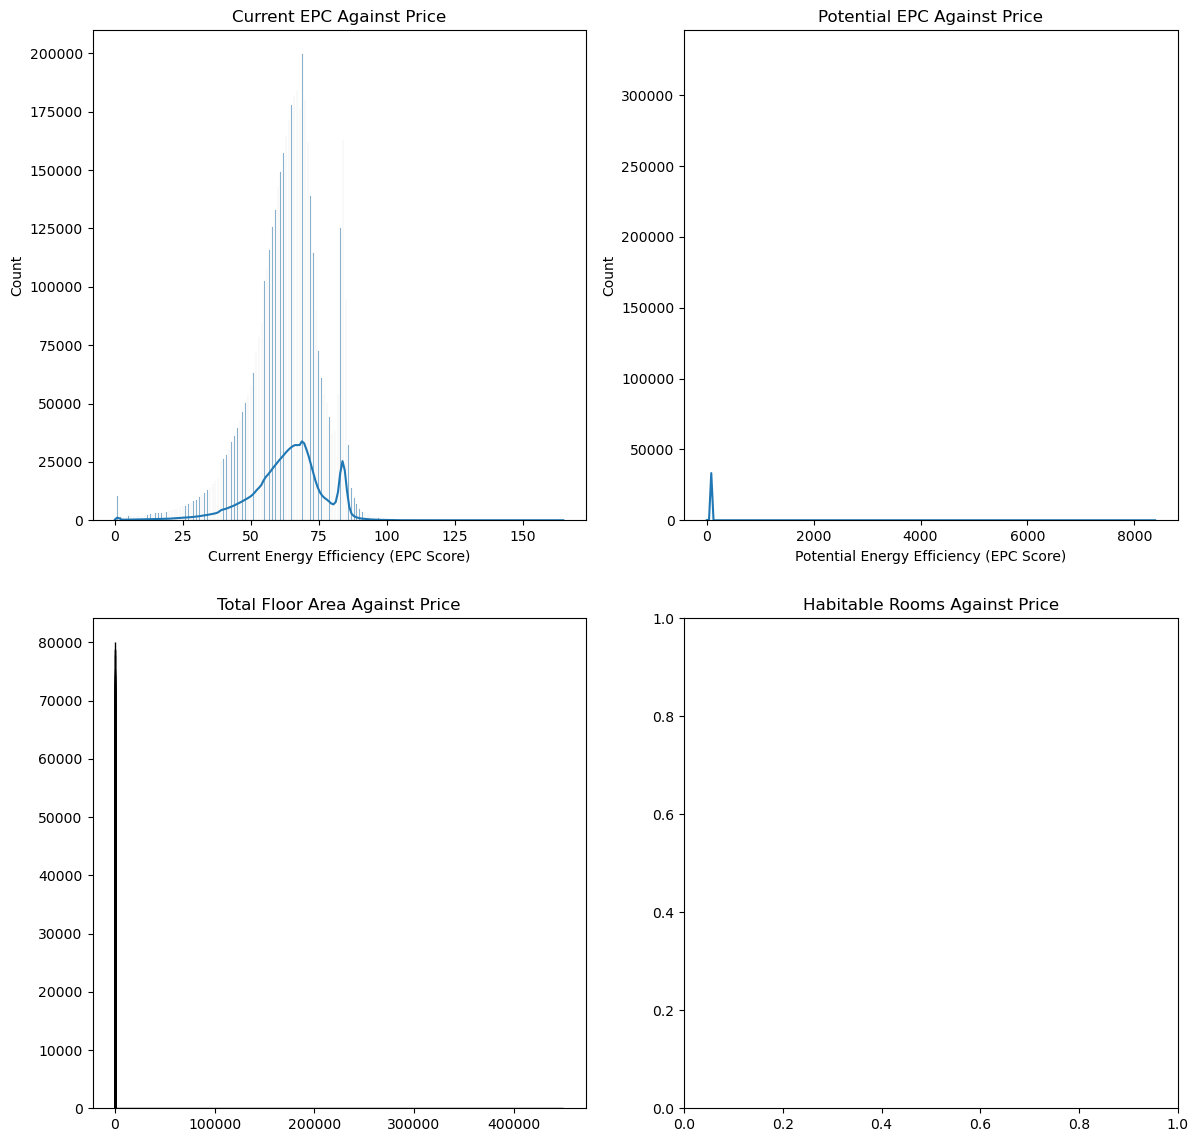

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax0.set_title('Current EPC Against Price')
ax1.set_title('Potential EPC Against Price')
ax2.set_title('Total Floor Area Against Price')
ax3.set_title('Habitable Rooms Against Price')

sns.histplot(df['Current Energy Efficiency (EPC Score)'],  kde=True, ax=ax0)
sns.histplot(df['Potential Energy Efficiency (EPC Score)'], kde=True, ax=ax1)
sns.histplot(df['Total Floor Area (m²)'], kde=True, ax=ax2)
sns.histplot(df['Number of Habitable Rooms'], kde=True, ax=ax3)

plt.subplots_adjust(hspace=0.3)

In [6]:
avg_Int_price = df.groupby('Interest rate (%)')['Price (Thousands)'].mean().reset_index()
avg_Int_price.columns = ['Interest rate (%)', 'Average Price (Thousands)']

avg_Une_price = df.groupby('Unemployment rate (%)')['Price (Thousands)'].mean().reset_index()
avg_Une_price.columns = ['Unemployment rate (%)', 'Average Price (Thousands)']

avg_Inf_price = df.groupby('Inflation rate (%)')['Price (Thousands)'].mean().reset_index()
avg_Inf_price.columns = ['Inflation rate (%)', 'Average Price (Thousands)']


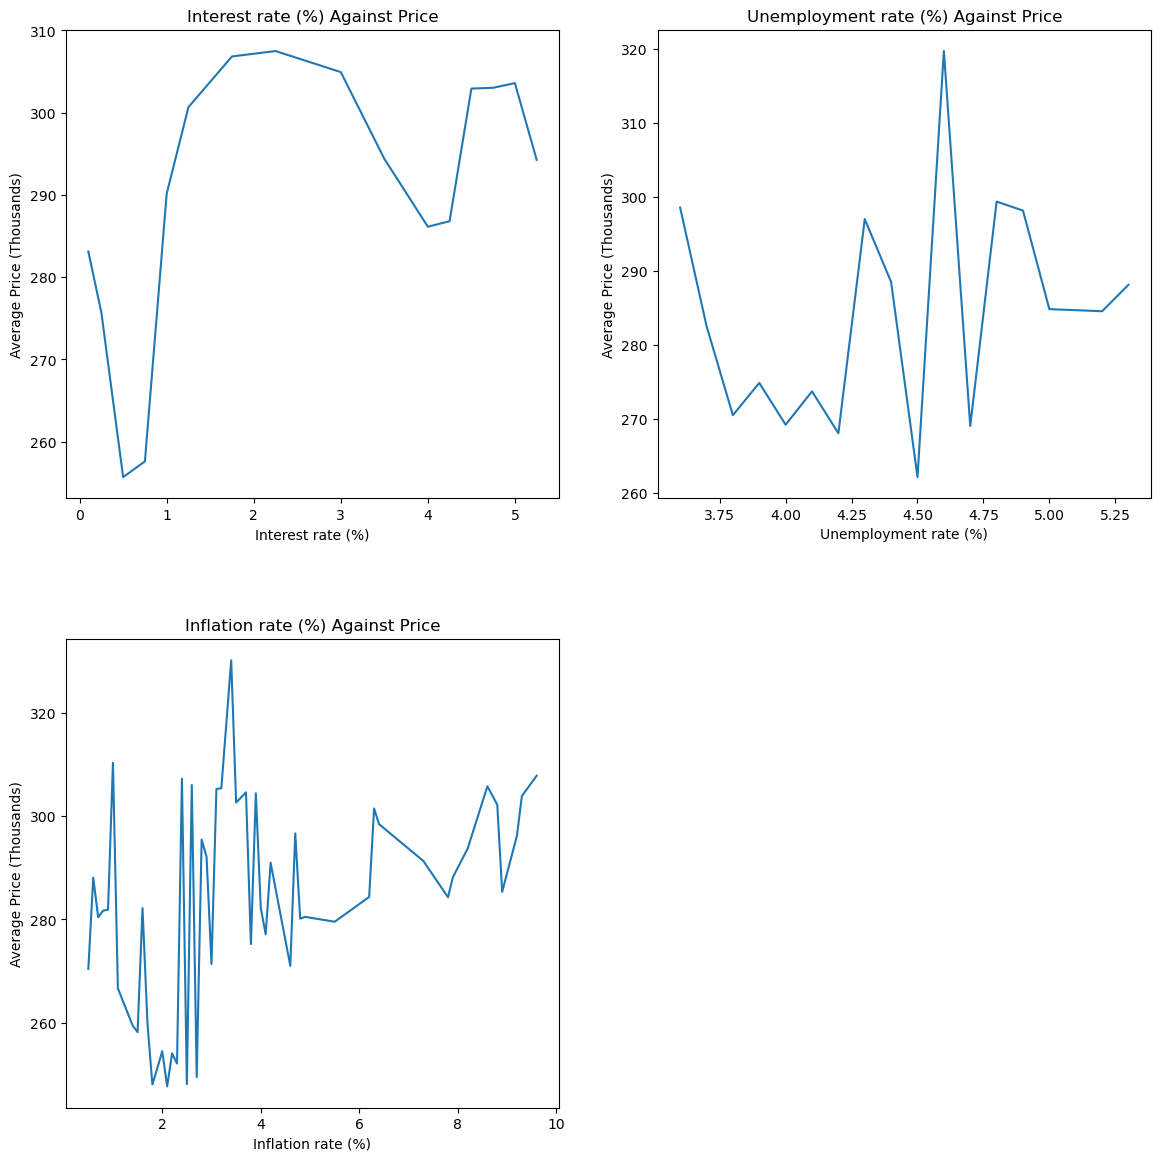

In [7]:
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)

ax0.set_title('Interest rate (%) Against Price')
ax1.set_title('Unemployment rate (%) Against Price')
ax2.set_title('Inflation rate (%) Against Price')

sns.lineplot(x='Interest rate (%)', y='Average Price (Thousands)', data=avg_Int_price, ax=ax0)
sns.lineplot(x='Unemployment rate (%)', y='Average Price (Thousands)', data=avg_Une_price, ax=ax1)
sns.lineplot(x='Inflation rate (%)', y='Average Price (Thousands)', data=avg_Inf_price, ax=ax2)


plt.subplots_adjust(hspace=0.3)

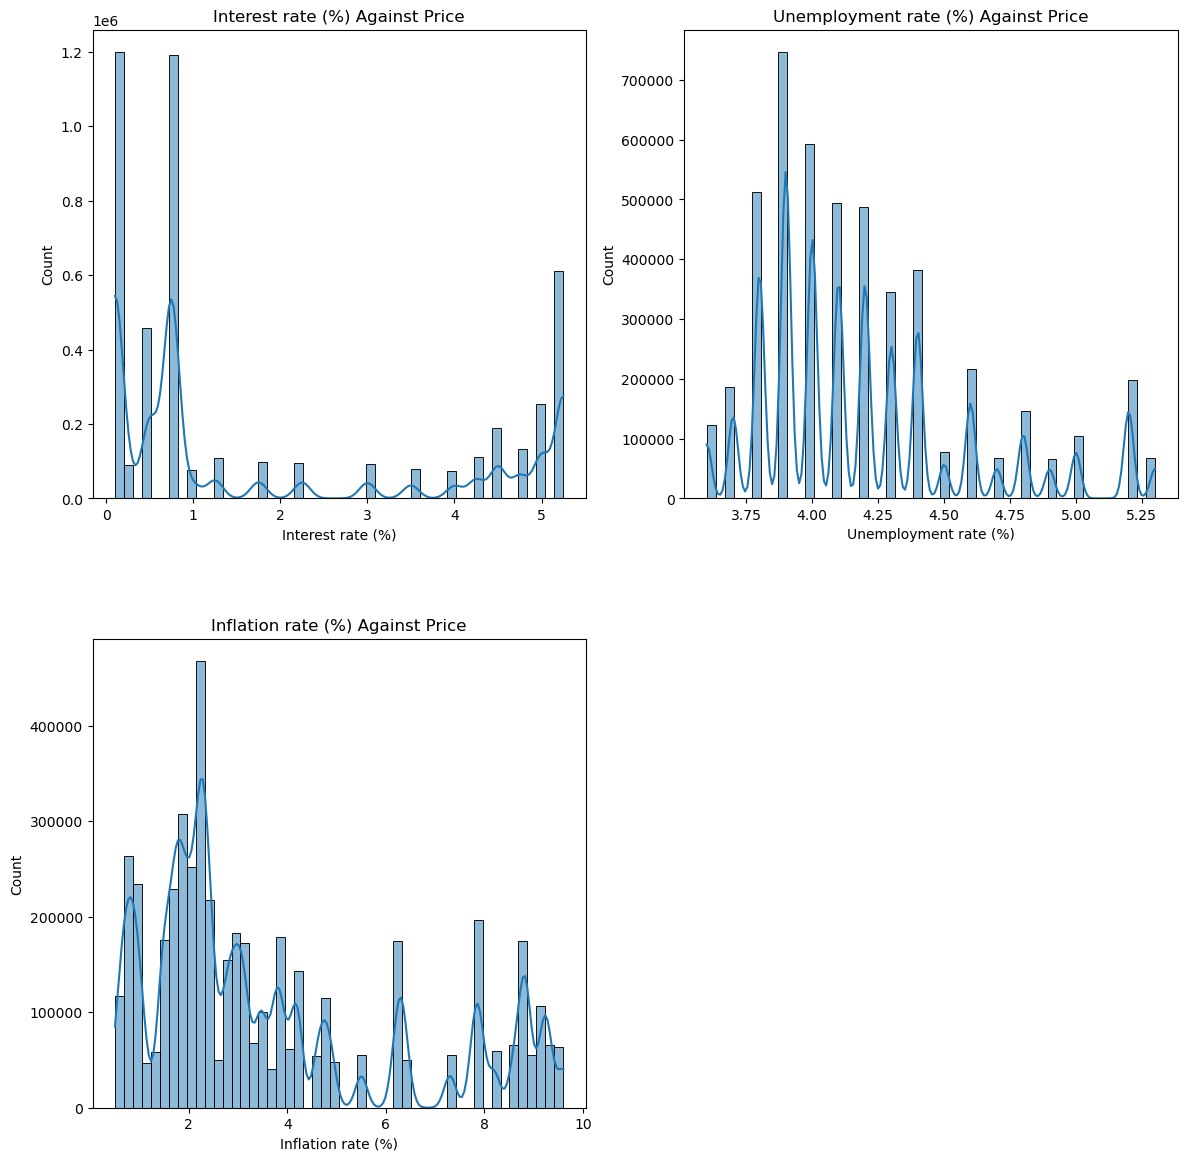

In [8]:
fig = plt.figure(figsize=(14, 14))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)

ax0.set_title('Interest rate (%) Against Price')
ax1.set_title('Unemployment rate (%) Against Price')
ax2.set_title('Inflation rate (%) Against Price')

sns.histplot(df['Interest rate (%)'], kde=True, bins=50, ax=ax0)
sns.histplot(df['Unemployment rate (%)'], kde=True, bins=50, ax=ax1)
sns.histplot(df['Inflation rate (%)'], kde=True, bins=50, ax=ax2)

plt.subplots_adjust(hspace=0.3)

In [ ]:
df.columns